In [1]:
# 1 (경제통계 자료분석). 한국은행 경제통계시스템(https://ecos.bok.or.kr)에 접속 후  <간편검색> - <17.거시경제분석 지표>에서 
# 교용률 및 국고채 3년 수익률에 대한 최근 10년치 자료를 다운받아 BOK_macro.csv로 저장한다.
# R 프로그램의 ts() 함수를 이용하여 자료를 시계열 자료로 변환한 후 다음의 작업을 수행한다.
# http://blog.naver.com/PostView.nhn?blogId=zerosum99&logNo=120180604904

BOK <- read.csv("./BOK_macro.csv", skip = 1, header = F)    # 해더 없음
BOK <- t(BOK[,c(5:length(BOK))])                            # 통계표, 항목명1, 단위, 변환 열 삭제

EmploymentRate.ts <- ts(BOK[, 1], start = c(2009,9), freq = 12)  # 09년 9월 ~ 19년 8월
TreasuryBond.ts <- ts(BOK[, 2], start = c(2009,9), freq = 12)    # 09년 9월 ~ 19년 8월

EmploymentRate.ts
TreasuryBond.ts

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
2009                                         59.4 59.4 59.2 57.8
2010 56.8 56.7 57.9 59.2 60.1 60.0 60.0 59.2 59.3 59.5 59.3 58.2
2011 57.0 57.3 58.5 59.5 60.4 60.5 60.2 59.8 59.3 60.1 59.9 58.7
2012 57.7 57.7 58.9 60.0 60.8 60.7 60.6 59.9 60.2 60.3 59.9 58.6
2013 57.7 57.5 58.7 60.0 60.6 60.8 60.7 60.2 60.6 60.8 60.7 59.4
2014 58.8 58.9 59.7 60.9 61.1 61.2 61.4 61.1 61.1 61.1 61.1 59.7
2015 59.0 59.1 59.8 60.6 61.2 61.2 61.3 60.9 61.1 61.2 61.0 60.1
2016 59.0 58.9 59.7 60.5 61.1 61.3 61.3 61.2 61.1 61.2 61.2 60.2
2017 59.1 59.3 60.3 61.0 61.5 61.5 61.6 61.2 61.4 61.4 61.4 60.4
2018 59.5 59.2 60.2 60.9 61.3 61.4 61.3 60.9 61.2 61.2 61.4 60.1
2019 59.2 59.4 60.4 60.8 61.5 61.6 61.5 61.4                    

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
2009                                         4.40 4.47 4.32 4.24
2010 4.29 4.19 3.94 3.77 3.70 3.75 3.88 3.73 3.48 3.24 3.40 3.25
2011 3.71 3.94 3.74 3.74 3.66 3.65 3.77 3.57 3.45 3.47 3.39 3.36
2012 3.37 3.43 3.55 3.50 3.38 3.29 3.01 2.83 2.81 2.78 2.80 2.85
2013 2.75 2.70 2.60 2.55 2.59 2.87 2.91 2.94 2.90 2.83 2.94 2.94
2014 2.89 2.85 2.87 2.88 2.84 2.75 2.56 2.54 2.41 2.24 2.14 2.14
2015 2.04 2.02 1.87 1.74 1.88 1.77 1.78 1.74 1.65 1.63 1.75 1.72
2016 1.63 1.47 1.50 1.47 1.46 1.33 1.22 1.24 1.31 1.36 1.61 1.69
2017 1.64 1.67 1.71 1.68 1.69 1.67 1.74 1.78 1.79 2.03 2.15 2.10
2018 2.19 2.28 2.27 2.19 2.25 2.18 2.10 2.02 1.95 2.01 1.94 1.83
2019 1.81 1.80 1.79 1.74 1.68 1.50 1.38 1.16                    

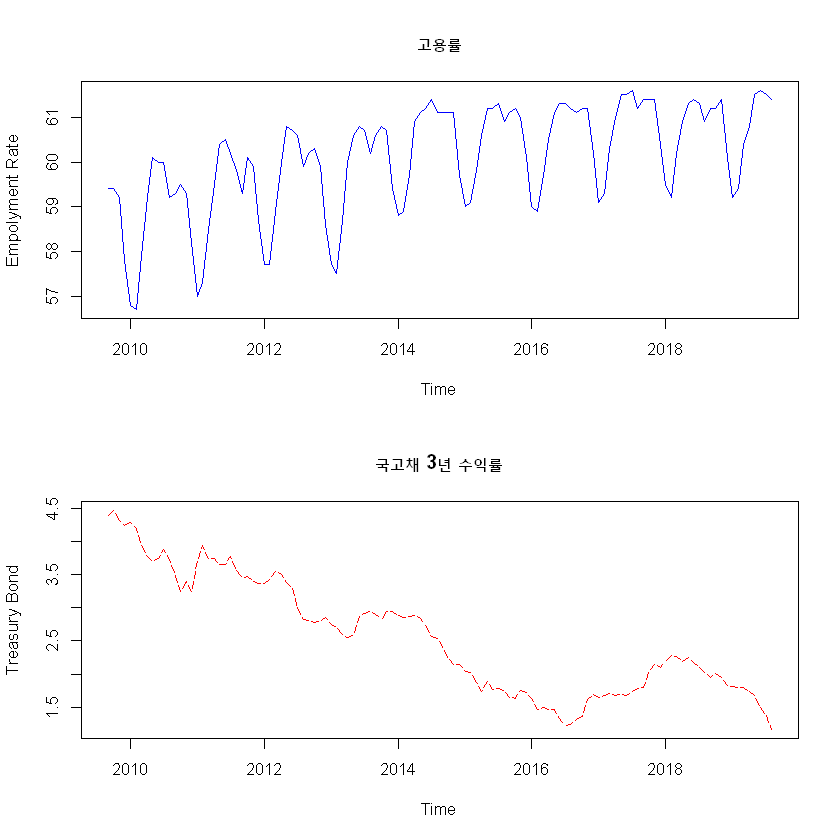

In [2]:
# (a) 각 자료에 대한 시도표(time plot)을 그려본다. 이때 par(mfrow=c(1,2)) 혹은 layout(…) 옵션을 지정하여 
# 두 개의 시도표를 하나의 그림 안에 포함시킨다.

# http://www.sthda.com/english/wiki/line-types-in-r-lty

layout(mat=matrix(c(1, 1,
                    2, 2), nrow=2, byrow = TRUE))

plot(EmploymentRate.ts
     , col='blue'
     , lty=1
     , ylab='Empolyment Rate'
     , main = "고용률")

plot(TreasuryBond.ts
     , col='red'
     , lty=5
     , ylab='Treasury Bond'
     , main = "국고채 3년 수익률")

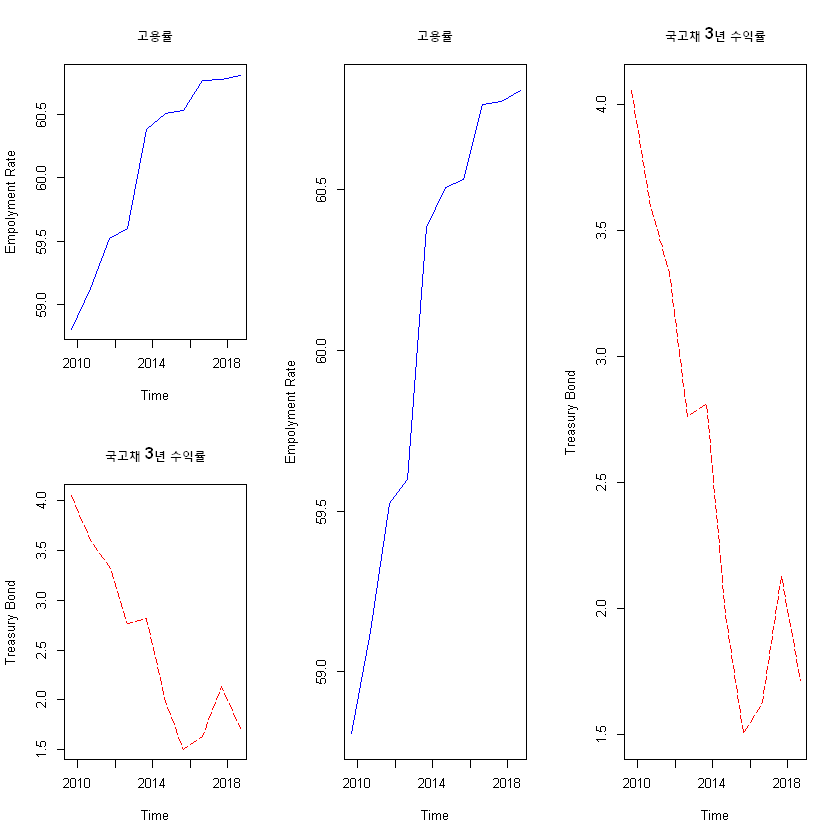

In [3]:
# (b) aggregate 함수를 이용, 연별 평균을 계산하여 이에 대한 시도표를 그린다. (a)와 같이 두 개의 시도표를 하나의 그림 안에 포함시킨다.
# aggregate 의 default 함수는 x 가 is.ts 일때, aggregate.ts 가 되고, FUN(function) = sum 이다. 따라서 평균은 FUN = mean 을 넣어야 한다.
# https://stackoverflow.com/questions/38810854/how-to-use-layout-function-in-r

layout(mat=matrix(c(1, 1, 3, 3, 4, 4,
                    2, 2, 3, 3, 4, 4), nrow=2, byrow = TRUE))
#layout.show(4)

plot(aggregate(EmploymentRate.ts
               , FUN = mean)
     , col='blue'
     , lty=1
     , ylab='Empolyment Rate'
     , main = "고용률")

plot(aggregate(TreasuryBond.ts
               , FUN = mean)
     , col='red'
     , lty=5
     , ylab='Treasury Bond'
     , main = "국고채 3년 수익률")

plot(aggregate(EmploymentRate.ts
               , FUN = mean)
     , col='blue'
     , lty=1
     , ylab='Empolyment Rate'
     , main = "고용률")

plot(aggregate(TreasuryBond.ts
               , FUN = mean)
     , col='red'
     , lty=5
     , ylab='Treasury Bond'
     , main = "국고채 3년 수익률")